# Построение сверточной нейронной сети для классификации изображений из датасета CIFAR-100, с использованием BatchNormalization() и Dropout()

[Код с пары](https://colab.research.google.com/drive/1cvPrPI09ySQy-D92gKTzmanVi2cj5Gw_?usp=sharing)

### Задание 1. Загрузите исходный датасет. Разделите его на обучающую и тестовую выборки. Визуализируйте несколько изображений из датасета. Произведите нормализацию данных. 


*P.S.: Не забудьте обратить внимание на размерность (shape) исходных данных и при необходимости измените её (см. примеры из предыдущих занятий)*

[Информация о датасете в Kaggle](https://www.kaggle.com/datasets/fedesoriano/cifar100?resource=download&select=meta)

[Техническая документация по использованию датасета в Keras](https://keras.io/api/datasets/cifar100/)





In [1]:
from tensorflow import keras

(trainX, trainY), (testX, testY) = keras.datasets.cifar100.load_data()
trainX = trainX.astype('float32') / 255
testX = testX.astype('float32') / 255


trainY = keras.utils.to_categorical(trainY, 100)
testY = keras.utils.to_categorical(testY, 100)

print('Train: X = ', trainX.shape)
print('Train: Y = ', trainY.shape)
print()
print('Test: X = ', testX.shape)
print('Test: Y = ', testY.shape)

169001437/169001437 [==============================] - 14s 0us/step
Train: X =  (50000, 32, 32, 3)
Train: Y =  (50000, 100)

Test: X =  (10000, 32, 32, 3)
Test: Y =  (10000, 100)


### Задание 2. Создайте модель сверточной нейронной сети для решения поставленной задачи без использования BatchNormalization() и Dropout(). 

Имя данной модели: model_1

In [2]:
from keras.layers import Activation, BatchNormalization, Dropout, Conv2D, Dense, Flatten, MaxPooling2D
from keras.models import Sequential

model_1 = Sequential()
model_1.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_1.add(Activation('relu'))
model_1.add(Conv2D(32, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Conv2D(64, (3, 3), padding='same'))
model_1.add(Activation('relu'))
model_1.add(Conv2D(64, (3, 3)))
model_1.add(Activation('relu'))
model_1.add(MaxPooling2D(pool_size=(2, 2)))

model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dense(100))
model_1.add(Activation('softmax'))

model_1.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 15, 15, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 15, 15, 64)        18496     
                                                        

Обучите созданную модель

In [3]:
batch_size = 128
epochs = 10

In [4]:
model_1_history = model_1.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 16s 16ms/step - loss: 3.7109 - accuracy: 0.1390 - val_loss: 3.1795 - val_accuracy: 0.2294
Epoch 2/10
391/391 [==============================] - 6s 16ms/step - loss: 2.8593 - accuracy: 0.2923 - val_loss: 2.7274 - val_accuracy: 0.3247
Epoch 3/10
391/391 [==============================] - 5s 13ms/step - loss: 2.4292 - accuracy: 0.3791 - val_loss: 2.5339 - val_accuracy: 0.3663
Epoch 4/10
391/391 [==============================] - 5s 14ms/step - loss: 2.1070 - accuracy: 0.4498 - val_loss: 2.4206 - val_accuracy: 0.3963
Epoch 5/10
391/391 [==============================] - 5s 13ms/step - loss: 1.8158 - accuracy: 0.5138 - val_loss: 2.3954 - val_accuracy: 0.4076
Epoch 6/10
391/391 [==============================] - 6s 14ms/step - loss: 1.5344 - accuracy: 0.5810 - val_loss: 2.5079 - val_accuracy: 0.3999
Epoch 7/10
391/391 [==============================] - 4s 10ms/step - loss: 1.2616 - accuracy: 0.6494 - val_loss: 2.6016 - val_accuracy: 0.411

### Задание 3. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием BatchNormalization(). 

Имя данной модели: model_2

In [5]:
model_2 = Sequential()
model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(BatchNormalization())
model_2.add(MaxPooling2D(pool_size=(2, 2)))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))

model_2.add(BatchNormalization())
model_2.add(Dense(100))
model_2.add(Activation('softmax'))

model_2.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_6 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_7 (Activation)   (None, 30, 30, 32)        0         
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

Обучите созданную модель

In [6]:
batch_size = 128
epochs = 10

In [7]:
model_2_history = model_2.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/10
391/391 [==============================] - 5s 11ms/step - loss: 3.2248 - accuracy: 0.2418 - val_loss: 4.1710 - val_accuracy: 0.1144
Epoch 2/10
391/391 [==============================] - 4s 11ms/step - loss: 2.2439 - accuracy: 0.4232 - val_loss: 2.7171 - val_accuracy: 0.3367
Epoch 3/10
391/391 [==============================] - 4s 10ms/step - loss: 1.7297 - accuracy: 0.5390 - val_loss: 2.6895 - val_accuracy: 0.3636
Epoch 4/10
391/391 [==============================] - 4s 10ms/step - loss: 1.3023 - accuracy: 0.6471 - val_loss: 2.7330 - val_accuracy: 0.3811
Epoch 5/10
391/391 [==============================] - 4s 11ms/step - loss: 0.8616 - accuracy: 0.7675 - val_loss: 2.7824 - val_accuracy: 0.3959
Epoch 6/10
391/391 [==============================] - 4s 11ms/step - loss: 0.4866 - accuracy: 0.8749 - val_loss: 2.7193 - val_accuracy: 0.4175
Epoch 7/10
391/391 [==============================] - 4s 11ms/step - loss: 0.2303 - accuracy: 0.9489 - val_loss: 3.0282 - val_accuracy: 0.3973

### Задание 4. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout(). 

Имя данной модели: model_3

In [8]:
model_3 = Sequential()
model_3.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_3.add(Activation('relu'))
model_3.add(Conv2D(32, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Conv2D(64, (3, 3), padding='same'))
model_3.add(Activation('relu'))
model_3.add(Conv2D(64, (3, 3)))
model_3.add(Activation('relu'))
model_3.add(MaxPooling2D(pool_size=(2, 2)))
model_3.add(Dropout(0.25))

model_3.add(Flatten())
model_3.add(Dense(512))
model_3.add(Activation('relu'))
model_3.add(Dropout(0.5))
model_3.add(Dense(100))
model_3.add(Activation('softmax'))

model_3.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_12 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        9248      
                                                                 
 activation_13 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 15, 15, 32)        0         
                                                      

Обучите созданную модель

In [9]:
batch_size = 128
epochs = 20

In [10]:
model_3_history = model_3.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/20
391/391 [==============================] - 4s 9ms/step - loss: 4.1333 - accuracy: 0.0666 - val_loss: 3.5664 - val_accuracy: 0.1597
Epoch 2/20
391/391 [==============================] - 4s 9ms/step - loss: 3.4703 - accuracy: 0.1719 - val_loss: 3.1121 - val_accuracy: 0.2478
Epoch 3/20
391/391 [==============================] - 4s 10ms/step - loss: 3.1570 - accuracy: 0.2284 - val_loss: 2.8474 - val_accuracy: 0.2965
Epoch 4/20
391/391 [==============================] - 6s 15ms/step - loss: 2.9349 - accuracy: 0.2694 - val_loss: 2.7347 - val_accuracy: 0.3192
Epoch 5/20
391/391 [==============================] - 5s 14ms/step - loss: 2.7713 - accuracy: 0.3024 - val_loss: 2.5220 - val_accuracy: 0.3643
Epoch 6/20
391/391 [==============================] - 6s 15ms/step - loss: 2.6305 - accuracy: 0.3306 - val_loss: 2.4327 - val_accuracy: 0.3810
Epoch 7/20
391/391 [==============================] - 5s 14ms/step - loss: 2.5221 - accuracy: 0.3520 - val_loss: 2.3490 - val_accuracy: 0.4004
E

### Задание 5. Создайте модель сверточной нейронной сети для решения поставленной задачи с использованием Dropout() и BatchNormalization().

См. рекомендации [здесь](https://stackoverflow.com/questions/39691902/ordering-of-batch-normalization-and-dropout) и [здесь](https://www.kaggle.com/code/ryanholbrook/dropout-and-batch-normalization/)

Имя данной модели: model_4

In [11]:
model_4 = Sequential()
model_4.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=(32, 32, 3)))
model_4.add(Activation('relu'))
model_4.add(Conv2D(32, (3, 3)))
model_4.add(Activation('relu'))

model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Conv2D(64, (3, 3), padding='same'))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(Conv2D(64, (3, 3)))
model_4.add(Activation('relu'))
model_4.add(BatchNormalization())
model_4.add(MaxPooling2D(pool_size=(2, 2)))
model_4.add(Dropout(0.25))

model_4.add(Flatten())

model_4.add(Dense(512))
model_4.add(Activation('relu'))

model_4.add(Dropout(0.5))
model_4.add(Dense(100))
model_4.add(Activation('softmax'))

model_4.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        896       
                                                                 
 activation_18 (Activation)  (None, 32, 32, 32)        0         
                                                                 
 conv2d_13 (Conv2D)          (None, 30, 30, 32)        9248      
                                                                 
 activation_19 (Activation)  (None, 30, 30, 32)        0         
                                                                 
 batch_normalization_4 (Batc  (None, 30, 30, 32)       128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                  

Обучите созданную модель

In [12]:
batch_size = 512
epochs = 25

In [13]:
model_4_history = model_4.fit(trainX, trainY,
                              batch_size=batch_size,
                              epochs=epochs,
                              verbose=1,
                              validation_data=(testX, testY))

Epoch 1/25
98/98 [==============================] - 5s 45ms/step - loss: 4.3514 - accuracy: 0.0643 - val_loss: 5.8002 - val_accuracy: 0.0116
Epoch 2/25
98/98 [==============================] - 4s 37ms/step - loss: 3.7367 - accuracy: 0.1377 - val_loss: 7.0745 - val_accuracy: 0.0126
Epoch 3/25
98/98 [==============================] - 4s 37ms/step - loss: 3.3833 - accuracy: 0.1944 - val_loss: 6.5822 - val_accuracy: 0.0262
Epoch 4/25
98/98 [==============================] - 3s 31ms/step - loss: 3.1184 - accuracy: 0.2386 - val_loss: 5.4022 - val_accuracy: 0.0512
Epoch 5/25
98/98 [==============================] - 3s 29ms/step - loss: 2.9174 - accuracy: 0.2761 - val_loss: 3.7647 - val_accuracy: 0.1557
Epoch 6/25
98/98 [==============================] - 3s 30ms/step - loss: 2.7405 - accuracy: 0.3085 - val_loss: 2.7331 - val_accuracy: 0.3118
Epoch 7/25
98/98 [==============================] - 3s 30ms/step - loss: 2.5863 - accuracy: 0.3407 - val_loss: 2.4513 - val_accuracy: 0.3721
Epoch 8/25
98

### Задание 5. Пойстройте график обучения для каждой модели. Сделайте выводы по каждому из них. Подведите итог и выделите наиболее удачную модель

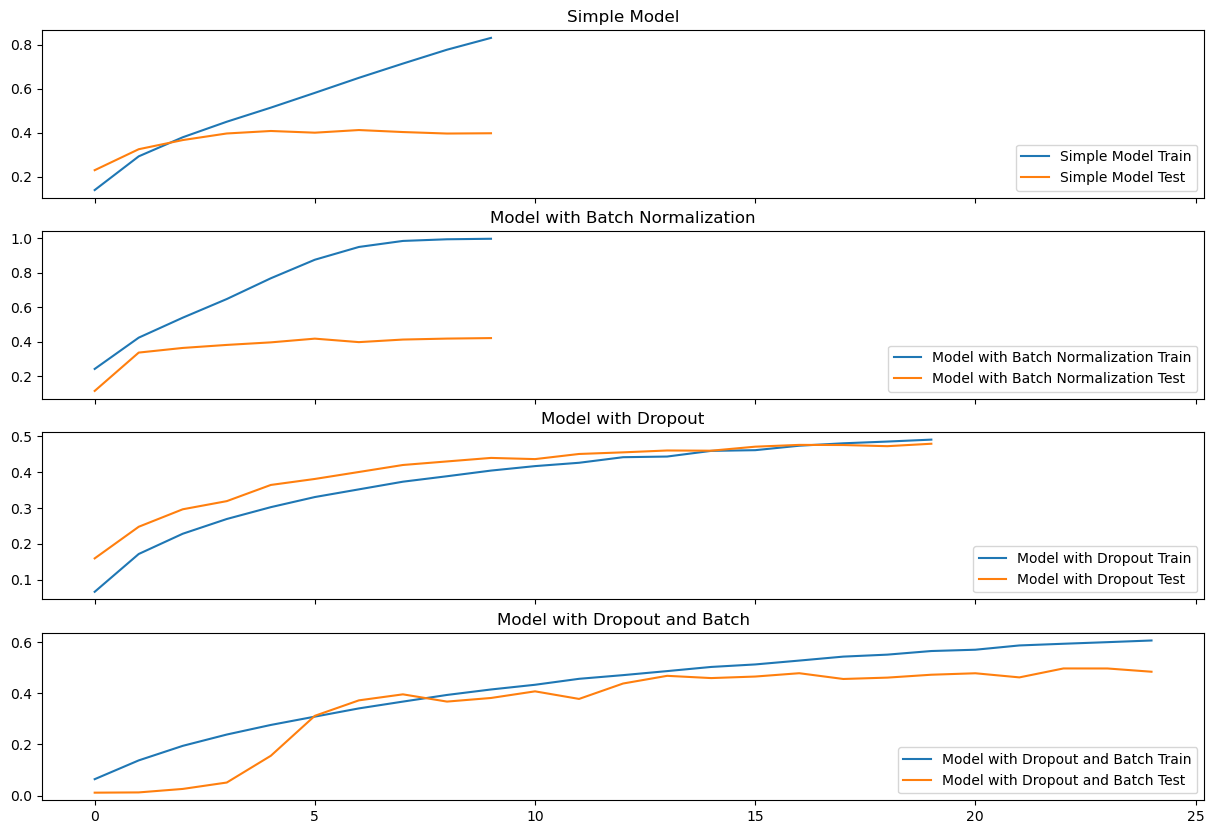

In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

fig, (model1Plt, model2Plt, model3Plt, model4Plt) = plt.subplots(4, sharex=True)

fig.set_figwidth(15)
fig.set_figheight(10)

model1Plt.set_title("Simple Model")
model1Plt.plot(model_1_history.history['accuracy'])
model1Plt.plot(model_1_history.history['val_accuracy'])
model1Plt.legend(['Simple Model Train', 'Simple Model Test'], loc="lower right")

model2Plt.set_title("Model with Batch Normalization")
model2Plt.plot(model_2_history.history['accuracy'])
model2Plt.plot(model_2_history.history['val_accuracy'])
model2Plt.legend(['Model with Batch Normalization Train', 'Model with Batch Normalization Test'], loc="lower right")

model3Plt.set_title("Model with Dropout")
model3Plt.plot(model_3_history.history['accuracy'])
model3Plt.plot(model_3_history.history['val_accuracy'])
model3Plt.legend(['Model with Dropout Train', 'Model with Dropout Test'], loc="lower right")

model4Plt.set_title("Model with Dropout and Batch")
model4Plt.plot(model_4_history.history['accuracy'])
model4Plt.plot(model_4_history.history['val_accuracy'])
_ = model4Plt.legend(['Model with Dropout and Batch Train', 'Model with Dropout and Batch Test'], loc="lower right")


#### Ваши выводы

Как видно из модели, из графиков, нормалищация батчами не значительно изменяет обучение и конечную точность модели. Dropout, а также Dropout совмещенный с нормализацией батчами значительно увеличивают эффективность модели, но в то же самое время увеличивают и количество эпох, необходимое для ее обучения

#### Ваш итог

Самую высокую точность показала модели использующая нормализацию батчами и Dropout, обучавшаяся в течение 25 эпох.

Ее точность составила: 48.39%